# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:26:43.590442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:26:46.386736
2025-04-14 20:26:46.386736


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:26:41"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

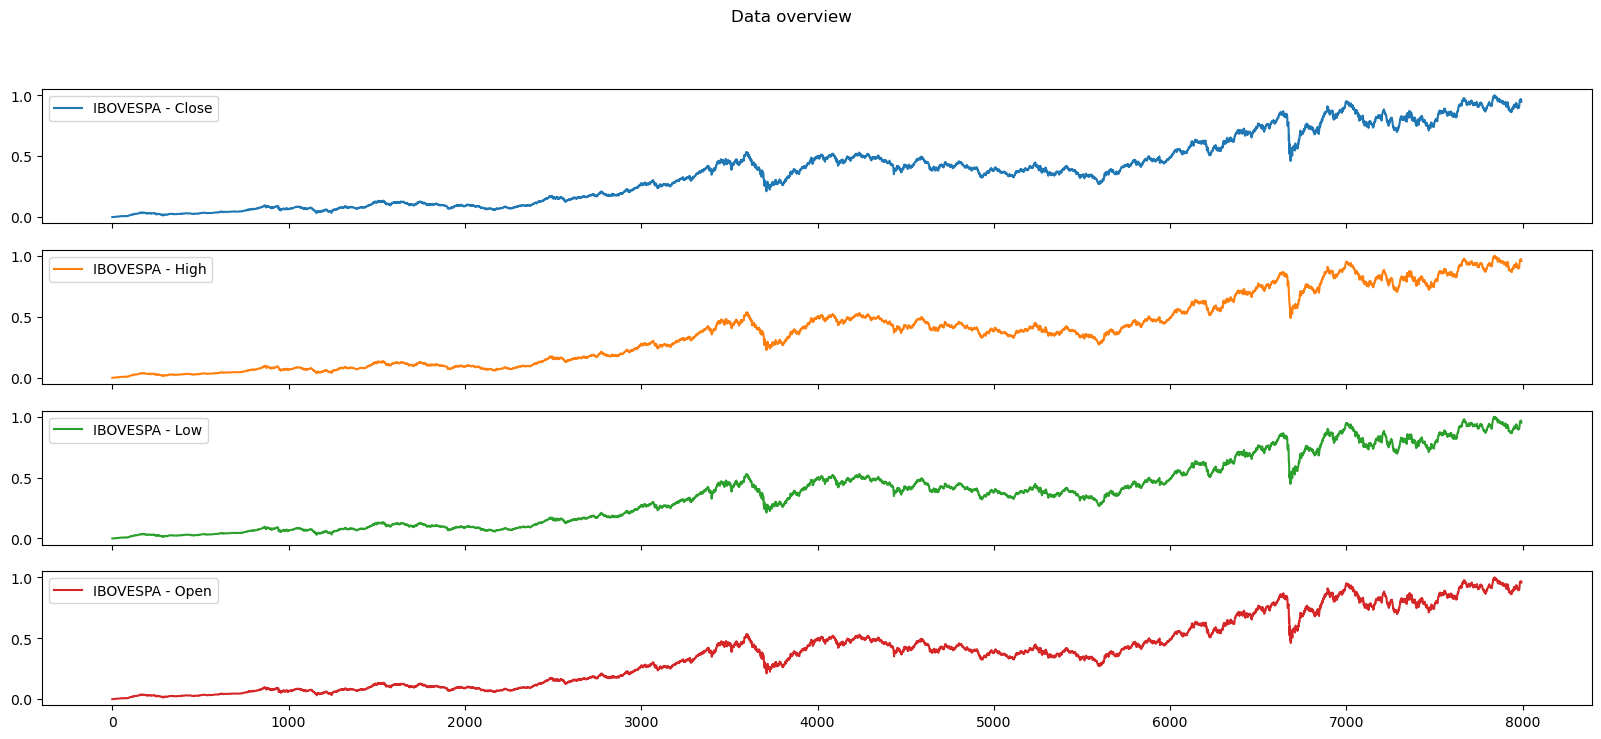

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

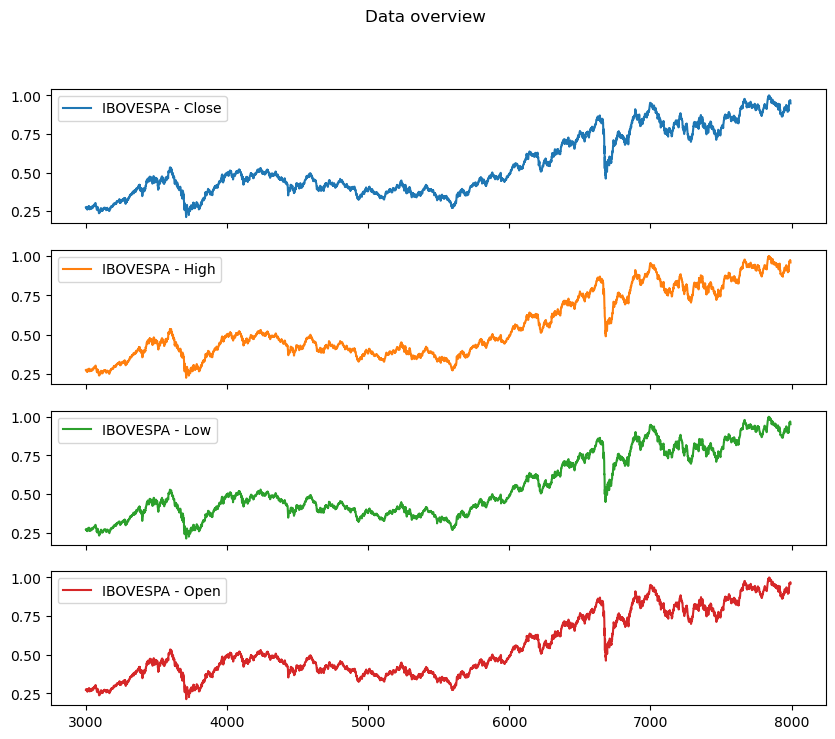

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

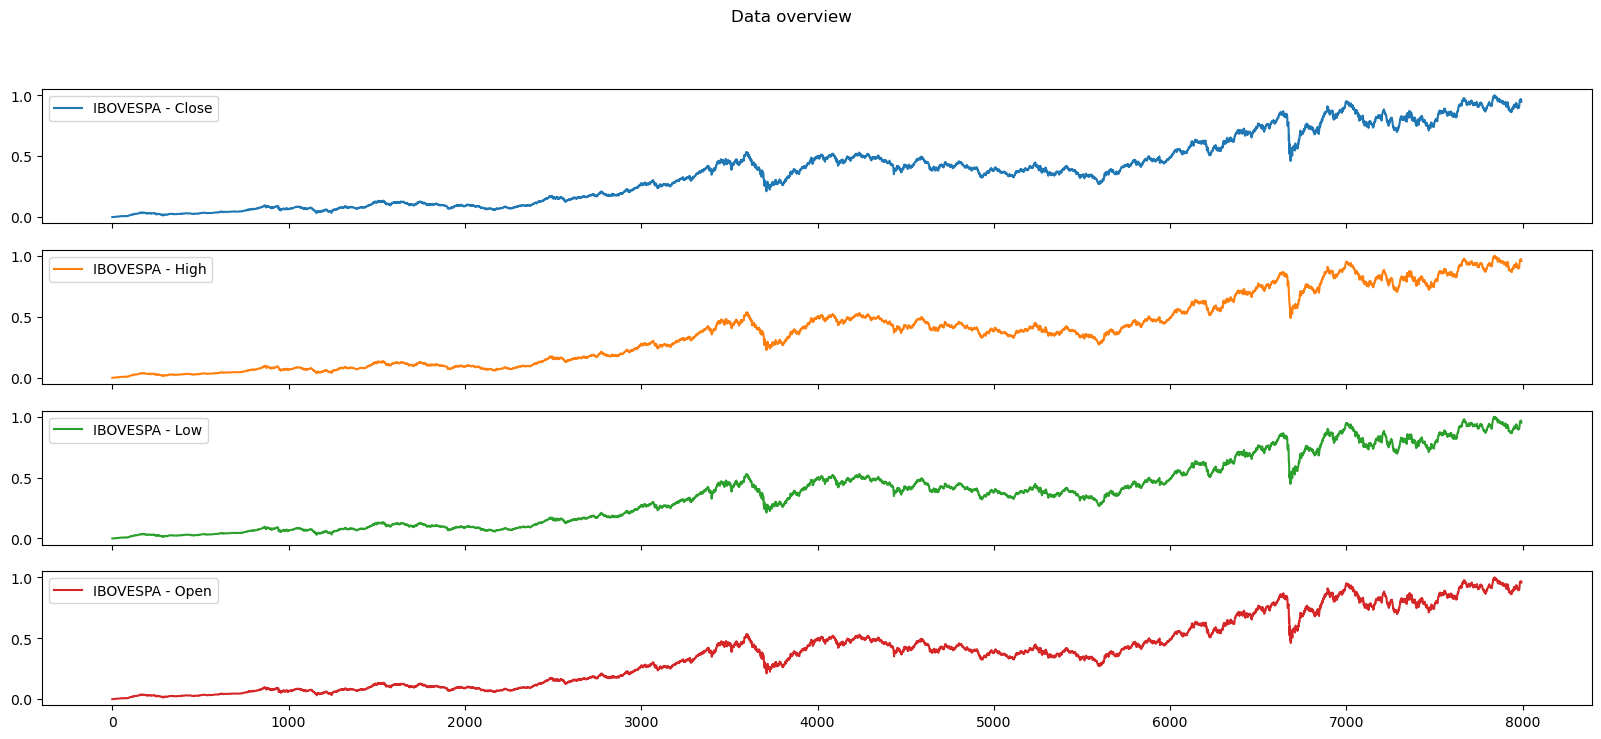

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

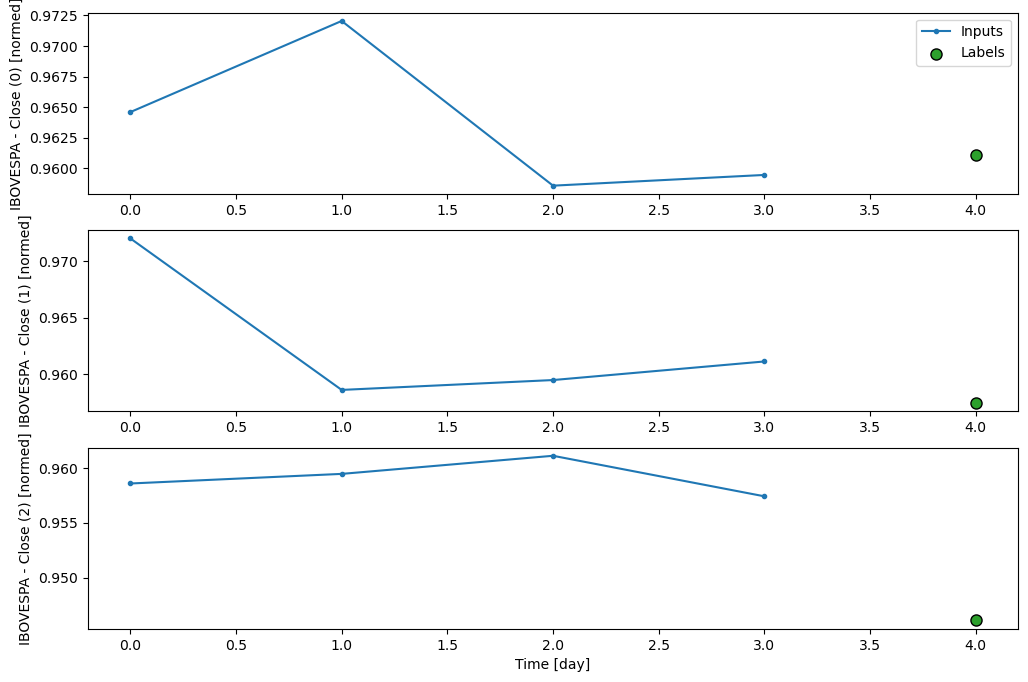

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8:22 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 59.1859 - mean_squared_error: 1.3056e-04 - root_mean_squared_error: 0.0103  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 49.0569 - mean_squared_error: 1.3724e-04 - root_mean_squared_error: 0.0111

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.5999 - mean_squared_error: 1.3940e-04 - root_mean_squared_error: 0.0114

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.7497 - mean_squared_error: 1.6625e-04 - root_mean_squared_error: 0.0124

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 36.2530 - mean_squared_error: 1.9368e-04 - root_mean_squared_error: 0.0134

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 34.2133 - mean_squared_error: 2.0941e-04 - root_mean_squared_error: 0.0140

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 32.8874 - mean_squared_error: 2.3865e-04 - root_mean_squared_error: 0.0149

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 31.5110 - mean_squared_error: 2.7021e-04 - root_mean_squared_error: 0.0158

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 30.3615 - mean_squared_error: 3.0480e-04 - root_mean_squared_error: 0.0167

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 29.3109 - mean_squared_error: 3.7622e-04 - root_mean_squared_error: 0.0182

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 28.4509 - mean_squared_error: 5.0626e-04 - root_mean_squared_error: 0.0205

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 27.6284 - mean_squared_error: 6.1141e-04 - root_mean_squared_error: 0.0223

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 26.8445 - mean_squared_error: 6.9301e-04 - root_mean_squared_error: 0.0237

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 26.1107 - mean_squared_error: 7.5770e-04 - root_mean_squared_error: 0.0249

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 25.5198 - mean_squared_error: 8.3350e-04 - root_mean_squared_error: 0.0261

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 24.9714 - mean_squared_error: 9.4449e-04 - root_mean_squared_error: 0.0277

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 24.4634 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293    

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 24.0409 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 23.6021 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327 - val_loss: 0.0773 - val_mean_absolute_error: 0.0773 - val_mean_absolute_percentage_error: 8.2347 - val_mean_squared_error: 0.0069 - val_root_mean_squared_error: 0.0833 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 19034.4297 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.4059

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 6767.7993 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3749  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 4413.3921 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3170

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 3353.4277 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2782

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 2735.6006 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2511

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 2352.8506 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2322

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 2052.4822 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2161

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 1826.1838 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2030

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 1648.8503 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1921

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1505.7241 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1829

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1387.5552 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1750

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 1288.1500 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1681

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1221.7177 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1634

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1162.4025 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1590

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1104.0483 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1546

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 1042.8580 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1499

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 988.6696 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1456 

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 940.3155 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1417

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 896.8832 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1381

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 854.7800 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1347 - val_loss: 0.0394 - val_mean_absolute_error: 0.0394 - val_mean_absolute_percentage_error: 4.1913 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0437 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 6526.1533 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1389

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 2220.5620 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1102 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1426.7484 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0897

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 1078.3086 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0777

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 877.4825 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 744.9498 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 656.6239 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 583.7590 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 526.7484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 480.7912 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 442.8826 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 411.0123 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 385.7621 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0446

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 361.9924 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 341.2375 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0418

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 322.9399 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0407

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 306.6797 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0396

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 292.1313 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 279.0372 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 272.5117 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272 - val_mean_absolute_percentage_error: 2.8941 - val_mean_squared_error: 9.8558e-04 - val_root_mean_squared_error: 0.0314 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 5560.1846 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1185

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 1906.2651 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0967 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 1230.6782 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0799

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 948.9008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0702 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 769.5895 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0630

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 652.0171 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 568.3899 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 505.4759 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 456.2149 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 416.4871 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 383.7083 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 356.1448 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 334.3011 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 315.2149 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 297.0655 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 281.0721 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 266.8626 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 254.1543 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 244.4082 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 236.2444 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343 - val_loss: 0.0202 - val_mean_absolute_error: 0.0202 - val_mean_absolute_percentage_error: 2.1544 - val_mean_squared_error: 5.7512e-04 - val_root_mean_squared_error: 0.0240 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 2895.0554 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 966.4454 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 623.6465 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 473.8494 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 392.3375 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 333.1031 - mean_squared_error: 8.9299e-04 - root_mean_squared_error: 0.0279

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 290.8815 - mean_squared_error: 7.9030e-04 - root_mean_squared_error: 0.0260

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 259.0673 - mean_squared_error: 7.1141e-04 - root_mean_squared_error: 0.0245

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 234.1246 - mean_squared_error: 6.4889e-04 - root_mean_squared_error: 0.0233

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 213.9800 - mean_squared_error: 5.9834e-04 - root_mean_squared_error: 0.0223

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 197.3420 - mean_squared_error: 5.5730e-04 - root_mean_squared_error: 0.0214

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 183.3347 - mean_squared_error: 5.2272e-04 - root_mean_squared_error: 0.0207

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 172.2234 - mean_squared_error: 4.9534e-04 - root_mean_squared_error: 0.0201

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 161.7525 - mean_squared_error: 4.6953e-04 - root_mean_squared_error: 0.0195

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 152.5999 - mean_squared_error: 4.4693e-04 - root_mean_squared_error: 0.0190

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 144.5280 - mean_squared_error: 4.2744e-04 - root_mean_squared_error: 0.0186

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 137.8773 - mean_squared_error: 4.1316e-04 - root_mean_squared_error: 0.0183

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 131.4066 - mean_squared_error: 4.0499e-04 - root_mean_squared_error: 0.0182

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 126.0190 - mean_squared_error: 4.1163e-04 - root_mean_squared_error: 0.0184

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 122.3008 - mean_squared_error: 4.2419e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.9480 - val_mean_squared_error: 5.1183e-04 - val_root_mean_squared_error: 0.0226 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 4102.2754 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0874

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 1415.5483 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 911.1395 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0599 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 689.1875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 561.2052 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 476.7337 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 416.3922 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 373.9639 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 337.6399 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 308.3815 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 284.2760 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 264.0330 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 247.9832 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 232.8561 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 219.6321 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 207.9623 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 197.5800 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 188.9597 - mean_squared_error: 9.9843e-04 - root_mean_squared_error: 0.0287

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 182.3846 - mean_squared_error: 9.7303e-04 - root_mean_squared_error: 0.0283

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 175.7121 - mean_squared_error: 9.4737e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.3090 - val_mean_squared_error: 2.3576e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 2050.1221 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 641.1944 - mean_squared_error: 9.5189e-04 - root_mean_squared_error: 0.0300

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 418.6263 - mean_squared_error: 6.5897e-04 - root_mean_squared_error: 0.0245

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 318.5202 - mean_squared_error: 5.1466e-04 - root_mean_squared_error: 0.0213

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 263.9259 - mean_squared_error: 4.3340e-04 - root_mean_squared_error: 0.0193

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 224.1447 - mean_squared_error: 3.7274e-04 - root_mean_squared_error: 0.0177

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 195.7934 - mean_squared_error: 3.2893e-04 - root_mean_squared_error: 0.0165

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 174.4136 - mean_squared_error: 2.9556e-04 - root_mean_squared_error: 0.0156

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 157.6410 - mean_squared_error: 2.6937e-04 - root_mean_squared_error: 0.0148

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 144.0943 - mean_squared_error: 2.4877e-04 - root_mean_squared_error: 0.0141

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 132.9057 - mean_squared_error: 2.3262e-04 - root_mean_squared_error: 0.0137

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 123.4855 - mean_squared_error: 2.1926e-04 - root_mean_squared_error: 0.0133

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 115.4333 - mean_squared_error: 2.0789e-04 - root_mean_squared_error: 0.0129

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 108.4643 - mean_squared_error: 1.9809e-04 - root_mean_squared_error: 0.0126

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 102.3687 - mean_squared_error: 1.8960e-04 - root_mean_squared_error: 0.0123

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 96.9897 - mean_squared_error: 1.8251e-04 - root_mean_squared_error: 0.0121 

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 92.2029 - mean_squared_error: 1.7667e-04 - root_mean_squared_error: 0.0120

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 87.9209 - mean_squared_error: 1.7597e-04 - root_mean_squared_error: 0.0120

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 84.3509 - mean_squared_error: 1.8072e-04 - root_mean_squared_error: 0.0122

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 82.6856 - mean_squared_error: 1.8323e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.4090 - val_mean_squared_error: 2.6475e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 2821.1660 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0601

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 949.8083 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 609.5010 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 469.4531 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 380.5100 - mean_squared_error: 9.8705e-04 - root_mean_squared_error: 0.0293

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 322.2757 - mean_squared_error: 8.4598e-04 - root_mean_squared_error: 0.0268

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 280.8493 - mean_squared_error: 7.4360e-04 - root_mean_squared_error: 0.0249

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 249.7007 - mean_squared_error: 6.6561e-04 - root_mean_squared_error: 0.0234

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 225.3361 - mean_squared_error: 6.0422e-04 - root_mean_squared_error: 0.0221

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 205.7058 - mean_squared_error: 5.5525e-04 - root_mean_squared_error: 0.0211

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 189.5341 - mean_squared_error: 5.1703e-04 - root_mean_squared_error: 0.0203

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 175.9519 - mean_squared_error: 4.8632e-04 - root_mean_squared_error: 0.0197

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 164.3598 - mean_squared_error: 4.6014e-04 - root_mean_squared_error: 0.0191

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 155.0591 - mean_squared_error: 4.3890e-04 - root_mean_squared_error: 0.0187

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 146.2084 - mean_squared_error: 4.1845e-04 - root_mean_squared_error: 0.0182

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 138.4039 - mean_squared_error: 4.0027e-04 - root_mean_squared_error: 0.0178

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 131.9714 - mean_squared_error: 3.8530e-04 - root_mean_squared_error: 0.0175

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 127.0939 - mean_squared_error: 3.7439e-04 - root_mean_squared_error: 0.0172

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 122.1684 - mean_squared_error: 3.6386e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 116.8643 - mean_squared_error: 3.5279e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0374 - val_mean_squared_error: 1.4862e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 1995.8053 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 661.0889 - mean_squared_error: 9.8936e-04 - root_mean_squared_error: 0.0308

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 425.1199 - mean_squared_error: 6.8673e-04 - root_mean_squared_error: 0.0252

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 321.5117 - mean_squared_error: 5.3548e-04 - root_mean_squared_error: 0.0219

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 261.7689 - mean_squared_error: 4.4386e-04 - root_mean_squared_error: 0.0196

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 222.3625 - mean_squared_error: 3.8185e-04 - root_mean_squared_error: 0.0180

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 194.2344 - mean_squared_error: 3.3682e-04 - root_mean_squared_error: 0.0168

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 173.0187 - mean_squared_error: 3.0254e-04 - root_mean_squared_error: 0.0158

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 156.3728 - mean_squared_error: 2.7554e-04 - root_mean_squared_error: 0.0150

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 142.9262 - mean_squared_error: 2.5417e-04 - root_mean_squared_error: 0.0143

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 132.6074 - mean_squared_error: 2.3858e-04 - root_mean_squared_error: 0.0139

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 123.1380 - mean_squared_error: 2.2436e-04 - root_mean_squared_error: 0.0134

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 115.0528 - mean_squared_error: 2.1230e-04 - root_mean_squared_error: 0.0131

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 108.0604 - mean_squared_error: 2.0183e-04 - root_mean_squared_error: 0.0127

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 101.9478 - mean_squared_error: 1.9269e-04 - root_mean_squared_error: 0.0124

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 96.5540 - mean_squared_error: 1.8467e-04 - root_mean_squared_error: 0.0122 

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 92.1054 - mean_squared_error: 1.7818e-04 - root_mean_squared_error: 0.0120

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 87.7708 - mean_squared_error: 1.7245e-04 - root_mean_squared_error: 0.0118

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 83.8656 - mean_squared_error: 1.6797e-04 - root_mean_squared_error: 0.0117

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 81.9187 - mean_squared_error: 1.6592e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0177 - val_mean_absolute_error: 0.0177 - val_mean_absolute_percentage_error: 1.8873 - val_mean_squared_error: 3.9844e-04 - val_root_mean_squared_error: 0.0200 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 1708.6912 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 535.7869 - mean_squared_error: 6.6943e-04 - root_mean_squared_error: 0.0252

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 349.9698 - mean_squared_error: 4.6445e-04 - root_mean_squared_error: 0.0206

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 266.4044 - mean_squared_error: 3.6345e-04 - root_mean_squared_error: 0.0179

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 217.8099 - mean_squared_error: 3.0279e-04 - root_mean_squared_error: 0.0162

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 187.6204 - mean_squared_error: 2.6414e-04 - root_mean_squared_error: 0.0150

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 163.9481 - mean_squared_error: 2.3349e-04 - root_mean_squared_error: 0.0140

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 146.0958 - mean_squared_error: 2.1015e-04 - root_mean_squared_error: 0.0132

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 132.0899 - mean_squared_error: 1.9199e-04 - root_mean_squared_error: 0.0125

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 120.7771 - mean_squared_error: 1.7801e-04 - root_mean_squared_error: 0.0120

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 112.0994 - mean_squared_error: 1.6851e-04 - root_mean_squared_error: 0.0117

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 104.7073 - mean_squared_error: 1.6106e-04 - root_mean_squared_error: 0.0115

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 97.8352 - mean_squared_error: 1.5466e-04 - root_mean_squared_error: 0.0113 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 91.8984 - mean_squared_error: 1.4926e-04 - root_mean_squared_error: 0.0111

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 87.0882 - mean_squared_error: 1.4493e-04 - root_mean_squared_error: 0.0110

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 82.4724 - mean_squared_error: 1.4085e-04 - root_mean_squared_error: 0.0109

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 78.9711 - mean_squared_error: 1.3787e-04 - root_mean_squared_error: 0.0108

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 76.0635 - mean_squared_error: 1.3585e-04 - root_mean_squared_error: 0.0107

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 72.8757 - mean_squared_error: 1.3462e-04 - root_mean_squared_error: 0.0107

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.7426 - mean_squared_error: 1.3405e-04 - root_mean_squared_error: 0.0108

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.5143 - mean_squared_error: 1.3401e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3473 - val_mean_squared_error: 2.4476e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 2536.2153 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 814.6772 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 535.7706 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 409.6493 - mean_squared_error: 9.5065e-04 - root_mean_squared_error: 0.0293

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 335.5150 - mean_squared_error: 7.9549e-04 - root_mean_squared_error: 0.0265

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 286.0476 - mean_squared_error: 6.8807e-04 - root_mean_squared_error: 0.0244

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 250.4469 - mean_squared_error: 6.0883e-04 - root_mean_squared_error: 0.0227

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 223.4655 - mean_squared_error: 5.4799e-04 - root_mean_squared_error: 0.0214

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 203.6978 - mean_squared_error: 5.0308e-04 - root_mean_squared_error: 0.0204

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 186.2255 - mean_squared_error: 4.6358e-04 - root_mean_squared_error: 0.0195

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 172.8044 - mean_squared_error: 4.3377e-04 - root_mean_squared_error: 0.0188

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 160.4815 - mean_squared_error: 4.0637e-04 - root_mean_squared_error: 0.0181

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 149.9553 - mean_squared_error: 3.8295e-04 - root_mean_squared_error: 0.0175

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 140.8489 - mean_squared_error: 3.6264e-04 - root_mean_squared_error: 0.0170

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 132.8860 - mean_squared_error: 3.4485e-04 - root_mean_squared_error: 0.0166

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 125.8584 - mean_squared_error: 3.2924e-04 - root_mean_squared_error: 0.0162

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 119.6047 - mean_squared_error: 3.1552e-04 - root_mean_squared_error: 0.0158

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 114.0054 - mean_squared_error: 3.0552e-04 - root_mean_squared_error: 0.0156

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 109.3321 - mean_squared_error: 2.9966e-04 - root_mean_squared_error: 0.0155

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 106.7988 - mean_squared_error: 2.9721e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299 - val_mean_absolute_percentage_error: 3.1851 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0326 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 1895.9692 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 640.3323 - mean_squared_error: 9.9812e-04 - root_mean_squared_error: 0.0311

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 418.8238 - mean_squared_error: 7.4904e-04 - root_mean_squared_error: 0.0267

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 325.7469 - mean_squared_error: 6.1702e-04 - root_mean_squared_error: 0.0240

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 265.8771 - mean_squared_error: 5.2217e-04 - root_mean_squared_error: 0.0219

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 226.3316 - mean_squared_error: 4.5572e-04 - root_mean_squared_error: 0.0203

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 198.0649 - mean_squared_error: 4.0625e-04 - root_mean_squared_error: 0.0190

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 178.1701 - mean_squared_error: 3.7054e-04 - root_mean_squared_error: 0.0180

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 161.1083 - mean_squared_error: 3.4000e-04 - root_mean_squared_error: 0.0172

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 147.3492 - mean_squared_error: 3.1691e-04 - root_mean_squared_error: 0.0166

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 136.0011 - mean_squared_error: 3.0067e-04 - root_mean_squared_error: 0.0162

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 127.1498 - mean_squared_error: 2.9194e-04 - root_mean_squared_error: 0.0160

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 118.9108 - mean_squared_error: 2.8416e-04 - root_mean_squared_error: 0.0158

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 111.7790 - mean_squared_error: 2.7665e-04 - root_mean_squared_error: 0.0157

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 105.5398 - mean_squared_error: 2.6951e-04 - root_mean_squared_error: 0.0155

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 100.4310 - mean_squared_error: 2.6327e-04 - root_mean_squared_error: 0.0153

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 96.5757 - mean_squared_error: 2.5840e-04 - root_mean_squared_error: 0.0152 

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 92.0298 - mean_squared_error: 2.5272e-04 - root_mean_squared_error: 0.0151

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 87.9361 - mean_squared_error: 2.4792e-04 - root_mean_squared_error: 0.0150

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 84.5020 - mean_squared_error: 2.4406e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154 - val_mean_absolute_percentage_error: 1.6406 - val_mean_squared_error: 3.0991e-04 - val_root_mean_squared_error: 0.0176 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 203.0685 - mean_squared_error: 1.8370e-05 - root_mean_squared_error: 0.0043

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 66.2824 - mean_squared_error: 1.8438e-05 - root_mean_squared_error: 0.0043  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 44.1972 - mean_squared_error: 1.5049e-05 - root_mean_squared_error: 0.0038

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 34.1504 - mean_squared_error: 1.3017e-05 - root_mean_squared_error: 0.0036

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 28.4589 - mean_squared_error: 1.2497e-05 - root_mean_squared_error: 0.0035

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 24.6563 - mean_squared_error: 1.2204e-05 - root_mean_squared_error: 0.0035

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 21.9389 - mean_squared_error: 1.2030e-05 - root_mean_squared_error: 0.0034

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.8694 - mean_squared_error: 1.1991e-05 - root_mean_squared_error: 0.0034

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.2226 - mean_squared_error: 1.2182e-05 - root_mean_squared_error: 0.0035

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.8771 - mean_squared_error: 1.3021e-05 - root_mean_squared_error: 0.0036

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.7626 - mean_squared_error: 1.4868e-05 - root_mean_squared_error: 0.0038

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.8190 - mean_squared_error: 1.7190e-05 - root_mean_squared_error: 0.0040

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.0093 - mean_squared_error: 1.9699e-05 - root_mean_squared_error: 0.0042

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 13.3019 - mean_squared_error: 2.1863e-05 - root_mean_squared_error: 0.0045

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.6791 - mean_squared_error: 2.3788e-05 - root_mean_squared_error: 0.0046

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 12.1256 - mean_squared_error: 2.5579e-05 - root_mean_squared_error: 0.0048

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.6290 - mean_squared_error: 2.7351e-05 - root_mean_squared_error: 0.0050

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 11.1833 - mean_squared_error: 3.0243e-05 - root_mean_squared_error: 0.0052

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.7801 - mean_squared_error: 3.3619e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 10.6350 - mean_squared_error: 3.4948e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2832 - val_mean_squared_error: 2.2442e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 2429.7170 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 817.2562 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 527.4510 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 400.3141 - mean_squared_error: 9.0206e-04 - root_mean_squared_error: 0.0286

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 326.7904 - mean_squared_error: 7.5414e-04 - root_mean_squared_error: 0.0258

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 281.2396 - mean_squared_error: 6.5884e-04 - root_mean_squared_error: 0.0239

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 245.4833 - mean_squared_error: 5.8197e-04 - root_mean_squared_error: 0.0223

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 218.5534 - mean_squared_error: 5.2313e-04 - root_mean_squared_error: 0.0210

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 197.4503 - mean_squared_error: 4.7656e-04 - root_mean_squared_error: 0.0199

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 181.6086 - mean_squared_error: 4.4164e-04 - root_mean_squared_error: 0.0191

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 167.3472 - mean_squared_error: 4.1092e-04 - root_mean_squared_error: 0.0183

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 155.3642 - mean_squared_error: 3.8541e-04 - root_mean_squared_error: 0.0177

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 145.1416 - mean_squared_error: 3.6400e-04 - root_mean_squared_error: 0.0172

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 136.9427 - mean_squared_error: 3.4685e-04 - root_mean_squared_error: 0.0168

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 129.1449 - mean_squared_error: 3.3065e-04 - root_mean_squared_error: 0.0163

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 123.2741 - mean_squared_error: 3.1840e-04 - root_mean_squared_error: 0.0160

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 117.5067 - mean_squared_error: 3.0642e-04 - root_mean_squared_error: 0.0157

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.3082 - mean_squared_error: 2.9678e-04 - root_mean_squared_error: 0.0155

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 107.2308 - mean_squared_error: 2.9232e-04 - root_mean_squared_error: 0.0154

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 102.9799 - mean_squared_error: 2.9065e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1247 - val_mean_squared_error: 1.7438e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 2064.6445 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 693.6431 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 447.0085 - mean_squared_error: 8.1066e-04 - root_mean_squared_error: 0.0274

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 345.2951 - mean_squared_error: 6.4901e-04 - root_mean_squared_error: 0.0242

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 280.5539 - mean_squared_error: 5.3966e-04 - root_mean_squared_error: 0.0218

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 238.0561 - mean_squared_error: 4.6531e-04 - root_mean_squared_error: 0.0201

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 207.7659 - mean_squared_error: 4.1088e-04 - root_mean_squared_error: 0.0187

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 184.9635 - mean_squared_error: 3.6935e-04 - root_mean_squared_error: 0.0176

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 167.1048 - mean_squared_error: 3.3671e-04 - root_mean_squared_error: 0.0167

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 153.7081 - mean_squared_error: 3.1277e-04 - root_mean_squared_error: 0.0160

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 141.6579 - mean_squared_error: 2.9271e-04 - root_mean_squared_error: 0.0155

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 131.5381 - mean_squared_error: 2.7664e-04 - root_mean_squared_error: 0.0151

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 122.9043 - mean_squared_error: 2.6316e-04 - root_mean_squared_error: 0.0147

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 115.4407 - mean_squared_error: 2.5144e-04 - root_mean_squared_error: 0.0144

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 108.9178 - mean_squared_error: 2.4110e-04 - root_mean_squared_error: 0.0141

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 103.1623 - mean_squared_error: 2.3191e-04 - root_mean_squared_error: 0.0138

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 98.0416 - mean_squared_error: 2.2375e-04 - root_mean_squared_error: 0.0136 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 93.4541 - mean_squared_error: 2.1700e-04 - root_mean_squared_error: 0.0134

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 89.6217 - mean_squared_error: 2.1165e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 87.2550 - mean_squared_error: 2.0845e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0595 - val_mean_squared_error: 1.4983e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 997.8606 - mean_squared_error: 4.5141e-04 - root_mean_squared_error: 0.0212

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 321.2807 - mean_squared_error: 2.2057e-04 - root_mean_squared_error: 0.0145 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 207.5801 - mean_squared_error: 1.5991e-04 - root_mean_squared_error: 0.0122

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 158.1131 - mean_squared_error: 1.3046e-04 - root_mean_squared_error: 0.0110

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 129.4798 - mean_squared_error: 1.1171e-04 - root_mean_squared_error: 0.0101

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 110.4533 - mean_squared_error: 9.8307e-05 - root_mean_squared_error: 0.0094

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 96.7983 - mean_squared_error: 8.8199e-05 - root_mean_squared_error: 0.0089 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 87.1736 - mean_squared_error: 8.1016e-05 - root_mean_squared_error: 0.0085

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.9044 - mean_squared_error: 7.4900e-05 - root_mean_squared_error: 0.0081

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 72.6892 - mean_squared_error: 7.0654e-05 - root_mean_squared_error: 0.0079

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 67.0924 - mean_squared_error: 6.7740e-05 - root_mean_squared_error: 0.0077

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 62.3842 - mean_squared_error: 6.5597e-05 - root_mean_squared_error: 0.0076

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 58.3618 - mean_squared_error: 6.3884e-05 - root_mean_squared_error: 0.0076

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.8807 - mean_squared_error: 6.2395e-05 - root_mean_squared_error: 0.0075

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.0567 - mean_squared_error: 6.1197e-05 - root_mean_squared_error: 0.0074

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 49.9422 - mean_squared_error: 6.0408e-05 - root_mean_squared_error: 0.0074

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.4664 - mean_squared_error: 5.9687e-05 - root_mean_squared_error: 0.0074

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.5779 - mean_squared_error: 5.9720e-05 - root_mean_squared_error: 0.0074

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 43.5562 - mean_squared_error: 6.1087e-05 - root_mean_squared_error: 0.0075

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 41.7288 - mean_squared_error: 6.3067e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0086 - val_mean_squared_error: 1.3771e-04 - val_root_mean_squared_error: 0.0117 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 2100.3130 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 674.7797 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 442.4115 - mean_squared_error: 8.1534e-04 - root_mean_squared_error: 0.0274

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 337.4456 - mean_squared_error: 6.4118e-04 - root_mean_squared_error: 0.0239

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 275.9676 - mean_squared_error: 5.3381e-04 - root_mean_squared_error: 0.0216

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 237.7191 - mean_squared_error: 4.6513e-04 - root_mean_squared_error: 0.0199

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 207.6348 - mean_squared_error: 4.1005e-04 - root_mean_squared_error: 0.0185

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 186.4839 - mean_squared_error: 3.7092e-04 - root_mean_squared_error: 0.0175

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 168.3596 - mean_squared_error: 3.3722e-04 - root_mean_squared_error: 0.0166

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 153.7473 - mean_squared_error: 3.1033e-04 - root_mean_squared_error: 0.0158

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 141.6973 - mean_squared_error: 2.8892e-04 - root_mean_squared_error: 0.0152

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 132.2883 - mean_squared_error: 2.7240e-04 - root_mean_squared_error: 0.0148

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 123.5386 - mean_squared_error: 2.5720e-04 - root_mean_squared_error: 0.0143

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 116.5244 - mean_squared_error: 2.4502e-04 - root_mean_squared_error: 0.0140

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 109.8555 - mean_squared_error: 2.3347e-04 - root_mean_squared_error: 0.0136

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 103.9803 - mean_squared_error: 2.2338e-04 - root_mean_squared_error: 0.0133

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 98.7601 - mean_squared_error: 2.1463e-04 - root_mean_squared_error: 0.0131 

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 94.0921 - mean_squared_error: 2.0864e-04 - root_mean_squared_error: 0.0129

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 89.8962 - mean_squared_error: 2.0782e-04 - root_mean_squared_error: 0.0130

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 87.5168 - mean_squared_error: 2.0835e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235 - val_mean_absolute_percentage_error: 2.5123 - val_mean_squared_error: 6.6140e-04 - val_root_mean_squared_error: 0.0257 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 1641.4172 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 547.7164 - mean_squared_error: 7.0056e-04 - root_mean_squared_error: 0.0260

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 353.3628 - mean_squared_error: 4.9344e-04 - root_mean_squared_error: 0.0214

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 267.9023 - mean_squared_error: 3.8808e-04 - root_mean_squared_error: 0.0187

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 218.4549 - mean_squared_error: 3.2331e-04 - root_mean_squared_error: 0.0169

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 185.7538 - mean_squared_error: 2.7901e-04 - root_mean_squared_error: 0.0155

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 162.3478 - mean_squared_error: 2.4652e-04 - root_mean_squared_error: 0.0145

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 144.6716 - mean_squared_error: 2.2168e-04 - root_mean_squared_error: 0.0136

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 130.7953 - mean_squared_error: 2.0211e-04 - root_mean_squared_error: 0.0129

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 120.3683 - mean_squared_error: 1.8777e-04 - root_mean_squared_error: 0.0124

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 110.9759 - mean_squared_error: 1.7564e-04 - root_mean_squared_error: 0.0120

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 103.0748 - mean_squared_error: 1.6552e-04 - root_mean_squared_error: 0.0116

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 96.3268 - mean_squared_error: 1.5693e-04 - root_mean_squared_error: 0.0113 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 90.9106 - mean_squared_error: 1.5001e-04 - root_mean_squared_error: 0.0111

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 86.8871 - mean_squared_error: 1.4487e-04 - root_mean_squared_error: 0.0109

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 82.5512 - mean_squared_error: 1.3940e-04 - root_mean_squared_error: 0.0107

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.3637 - mean_squared_error: 1.3423e-04 - root_mean_squared_error: 0.0105

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 74.8954 - mean_squared_error: 1.3040e-04 - root_mean_squared_error: 0.0103

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 71.5041 - mean_squared_error: 1.2750e-04 - root_mean_squared_error: 0.0103

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 68.6633 - mean_squared_error: 1.2544e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1175 - val_mean_squared_error: 1.7059e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 1294.1460 - mean_squared_error: 7.6096e-04 - root_mean_squared_error: 0.0276

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 608.5582 - mean_squared_error: 5.2746e-04 - root_mean_squared_error: 0.0227  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 497.4220 - mean_squared_error: 4.5583e-04 - root_mean_squared_error: 0.0210

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 391.3277 - mean_squared_error: 3.8421e-04 - root_mean_squared_error: 0.0192

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 317.3701 - mean_squared_error: 3.2806e-04 - root_mean_squared_error: 0.0176

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 251.2791 - mean_squared_error: 2.7179e-04 - root_mean_squared_error: 0.0159 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 202.9858 - mean_squared_error: 2.2710e-04 - root_mean_squared_error: 0.0144

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 174.1674 - mean_squared_error: 1.9912e-04 - root_mean_squared_error: 0.0133

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 160.8846 - mean_squared_error: 1.8585e-04 - root_mean_squared_error: 0.0128

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 149.6955 - mean_squared_error: 1.7447e-04 - root_mean_squared_error: 0.0124

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 135.8391 - mean_squared_error: 1.6010e-04 - root_mean_squared_error: 0.0118

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 124.5777 - mean_squared_error: 1.4821e-04 - root_mean_squared_error: 0.0113

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 114.2823 - mean_squared_error: 1.3728e-04 - root_mean_squared_error: 0.0108

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 104.9455 - mean_squared_error: 1.2736e-04 - root_mean_squared_error: 0.0104

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 97.1647 - mean_squared_error: 1.1932e-04 - root_mean_squared_error: 0.0100 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 91.6987 - mean_squared_error: 1.1423e-04 - root_mean_squared_error: 0.0098

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.3872 - mean_squared_error: 1.1043e-04 - root_mean_squared_error: 0.0097

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 83.5055 - mean_squared_error: 1.0710e-04 - root_mean_squared_error: 0.0095

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 79.9909 - mean_squared_error: 1.0418e-04 - root_mean_squared_error: 0.0094

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 76.7924 - mean_squared_error: 1.0161e-04 - root_mean_squared_error: 0.0093

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 72.8333 - mean_squared_error: 9.8422e-05 - root_mean_squared_error: 0.0092

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.3047 - mean_squared_error: 9.5607e-05 - root_mean_squared_error: 0.0090

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.9698 - mean_squared_error: 9.3791e-05 - root_mean_squared_error: 0.0090

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 64.2873 - mean_squared_error: 9.1782e-05 - root_mean_squared_error: 0.0089

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.6006 - mean_squared_error: 8.9945e-05 - root_mean_squared_error: 0.0088

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.1558 - mean_squared_error: 8.9433e-05 - root_mean_squared_error: 0.0088

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 57.3155 - mean_squared_error: 9.1154e-05 - root_mean_squared_error: 0.0089

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 55.0566 - mean_squared_error: 9.5299e-05 - root_mean_squared_error: 0.0091

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.6999 - mean_squared_error: 9.5994e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151 - val_mean_absolute_percentage_error: 1.6125 - val_mean_squared_error: 3.0724e-04 - val_root_mean_squared_error: 0.0175 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 1584.6592 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0338

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 584.6987 - mean_squared_error: 7.0957e-04 - root_mean_squared_error: 0.0262

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 407.2364 - mean_squared_error: 5.4657e-04 - root_mean_squared_error: 0.0228

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 306.4499 - mean_squared_error: 4.3882e-04 - root_mean_squared_error: 0.0202

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 262.1950 - mean_squared_error: 3.8605e-04 - root_mean_squared_error: 0.0188

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 223.6464 - mean_squared_error: 3.3739e-04 - root_mean_squared_error: 0.0175

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 195.9617 - mean_squared_error: 3.0106e-04 - root_mean_squared_error: 0.0164

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 182.7434 - mean_squared_error: 2.8325e-04 - root_mean_squared_error: 0.0158

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 164.6542 - mean_squared_error: 2.5834e-04 - root_mean_squared_error: 0.0150

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.8646 - mean_squared_error: 2.3618e-04 - root_mean_squared_error: 0.0143

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 136.1180 - mean_squared_error: 2.1808e-04 - root_mean_squared_error: 0.0137

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 125.5867 - mean_squared_error: 2.0315e-04 - root_mean_squared_error: 0.0131

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 117.4741 - mean_squared_error: 1.9216e-04 - root_mean_squared_error: 0.0127

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 110.4556 - mean_squared_error: 1.8320e-04 - root_mean_squared_error: 0.0124

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 103.7392 - mean_squared_error: 1.7478e-04 - root_mean_squared_error: 0.0121

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 98.3757 - mean_squared_error: 1.6812e-04 - root_mean_squared_error: 0.0119 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 92.7006 - mean_squared_error: 1.6107e-04 - root_mean_squared_error: 0.0117

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 88.4984 - mean_squared_error: 1.5582e-04 - root_mean_squared_error: 0.0115

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 85.8004 - mean_squared_error: 1.5242e-04 - root_mean_squared_error: 0.0114

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 82.9327 - mean_squared_error: 1.4881e-04 - root_mean_squared_error: 0.0112

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 78.7003 - mean_squared_error: 1.4350e-04 - root_mean_squared_error: 0.0110

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.4760 - mean_squared_error: 1.3964e-04 - root_mean_squared_error: 0.0109

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 72.2784 - mean_squared_error: 1.3644e-04 - root_mean_squared_error: 0.0108

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 69.8349 - mean_squared_error: 1.3420e-04 - root_mean_squared_error: 0.0107

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 68.2314 - mean_squared_error: 1.3282e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8781 - val_mean_squared_error: 1.0636e-04 - val_root_mean_squared_error: 0.0103 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 1046.0428 - mean_squared_error: 4.9708e-04 - root_mean_squared_error: 0.0223

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 377.2608 - mean_squared_error: 2.7758e-04 - root_mean_squared_error: 0.0164  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 240.1319 - mean_squared_error: 2.0138e-04 - root_mean_squared_error: 0.0138

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 189.2520 - mean_squared_error: 1.6728e-04 - root_mean_squared_error: 0.0125

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 157.9463 - mean_squared_error: 1.4467e-04 - root_mean_squared_error: 0.0115

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 136.4595 - mean_squared_error: 1.2832e-04 - root_mean_squared_error: 0.0108

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 124.9370 - mean_squared_error: 1.1921e-04 - root_mean_squared_error: 0.0103

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 111.8123 - mean_squared_error: 1.0851e-04 - root_mean_squared_error: 0.0098

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 101.4471 - mean_squared_error: 9.9815e-05 - root_mean_squared_error: 0.0094

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 93.0288 - mean_squared_error: 9.2664e-05 - root_mean_squared_error: 0.0090 

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 85.4047 - mean_squared_error: 8.6189e-05 - root_mean_squared_error: 0.0086

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 79.5919 - mean_squared_error: 8.1434e-05 - root_mean_squared_error: 0.0084

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.0254 - mean_squared_error: 7.8873e-05 - root_mean_squared_error: 0.0083

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 71.5143 - mean_squared_error: 7.6027e-05 - root_mean_squared_error: 0.0081

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 66.8332 - mean_squared_error: 7.3307e-05 - root_mean_squared_error: 0.0080

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.1072 - mean_squared_error: 7.1315e-05 - root_mean_squared_error: 0.0079

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 60.1019 - mean_squared_error: 6.9757e-05 - root_mean_squared_error: 0.0078

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 57.6587 - mean_squared_error: 6.8491e-05 - root_mean_squared_error: 0.0078

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.3954 - mean_squared_error: 6.7840e-05 - root_mean_squared_error: 0.0077

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.4290 - mean_squared_error: 6.7357e-05 - root_mean_squared_error: 0.0077

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.2723 - mean_squared_error: 6.6802e-05 - root_mean_squared_error: 0.0077

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 52.7415 - mean_squared_error: 6.6114e-05 - root_mean_squared_error: 0.0077

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.3311 - mean_squared_error: 6.5165e-05 - root_mean_squared_error: 0.0076

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 48.1575 - mean_squared_error: 6.5222e-05 - root_mean_squared_error: 0.0077

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 46.0335 - mean_squared_error: 6.7341e-05 - root_mean_squared_error: 0.0078

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.3967 - mean_squared_error: 6.9919e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6188 - val_mean_squared_error: 3.0631e-04 - val_root_mean_squared_error: 0.0175 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 1441.2253 - mean_squared_error: 9.4439e-04 - root_mean_squared_error: 0.0307

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 466.6910 - mean_squared_error: 5.6574e-04 - root_mean_squared_error: 0.0234  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 310.9182 - mean_squared_error: 4.2662e-04 - root_mean_squared_error: 0.0201

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 243.3091 - mean_squared_error: 3.5171e-04 - root_mean_squared_error: 0.0181

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 199.3553 - mean_squared_error: 2.9824e-04 - root_mean_squared_error: 0.0165

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 170.1171 - mean_squared_error: 2.6071e-04 - root_mean_squared_error: 0.0153

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 149.1361 - mean_squared_error: 2.3281e-04 - root_mean_squared_error: 0.0144

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 133.2377 - mean_squared_error: 2.1122e-04 - root_mean_squared_error: 0.0136

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 120.7256 - mean_squared_error: 1.9450e-04 - root_mean_squared_error: 0.0130

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 111.3059 - mean_squared_error: 1.8295e-04 - root_mean_squared_error: 0.0126

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 104.6412 - mean_squared_error: 1.7669e-04 - root_mean_squared_error: 0.0124

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.8264 - mean_squared_error: 1.7324e-04 - root_mean_squared_error: 0.0123 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.1820 - mean_squared_error: 1.7077e-04 - root_mean_squared_error: 0.0123

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 89.5626 - mean_squared_error: 1.6809e-04 - root_mean_squared_error: 0.0122

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.0323 - mean_squared_error: 1.6514e-04 - root_mean_squared_error: 0.0122

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 81.3366 - mean_squared_error: 1.6253e-04 - root_mean_squared_error: 0.0121

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 77.3503 - mean_squared_error: 1.5955e-04 - root_mean_squared_error: 0.0120

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 74.0610 - mean_squared_error: 1.5699e-04 - root_mean_squared_error: 0.0119

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.5931 - mean_squared_error: 1.5507e-04 - root_mean_squared_error: 0.0119

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 69.7977 - mean_squared_error: 1.5392e-04 - root_mean_squared_error: 0.0118

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 68.3368 - mean_squared_error: 1.5299e-04 - root_mean_squared_error: 0.0118

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 65.6111 - mean_squared_error: 1.5142e-04 - root_mean_squared_error: 0.0118

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 64.3377 - mean_squared_error: 1.5071e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4320 - val_mean_squared_error: 2.3998e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 292.1704 - mean_squared_error: 3.9068e-05 - root_mean_squared_error: 0.0063

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 109.9339 - mean_squared_error: 2.0698e-05 - root_mean_squared_error: 0.0045 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 69.9067 - mean_squared_error: 1.5896e-05 - root_mean_squared_error: 0.0039 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 53.1207 - mean_squared_error: 1.3243e-05 - root_mean_squared_error: 0.0036

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 43.6065 - mean_squared_error: 1.2130e-05 - root_mean_squared_error: 0.0034

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 37.4603 - mean_squared_error: 1.1745e-05 - root_mean_squared_error: 0.0034

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 33.0433 - mean_squared_error: 1.1428e-05 - root_mean_squared_error: 0.0033

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 29.7069 - mean_squared_error: 1.1165e-05 - root_mean_squared_error: 0.0033

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 27.1046 - mean_squared_error: 1.1004e-05 - root_mean_squared_error: 0.0033

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.7879 - mean_squared_error: 1.0947e-05 - root_mean_squared_error: 0.0033

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.2510 - mean_squared_error: 1.0906e-05 - root_mean_squared_error: 0.0033

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 22.9163 - mean_squared_error: 1.0962e-05 - root_mean_squared_error: 0.0033

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 21.2119 - mean_squared_error: 1.1421e-05 - root_mean_squared_error: 0.0033

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 19.8999 - mean_squared_error: 1.2682e-05 - root_mean_squared_error: 0.0035

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.8685 - mean_squared_error: 1.4220e-05 - root_mean_squared_error: 0.0037

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 18.0440 - mean_squared_error: 1.5608e-05 - root_mean_squared_error: 0.0038

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.1474 - mean_squared_error: 1.7280e-05 - root_mean_squared_error: 0.0040

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.2826 - mean_squared_error: 1.8833e-05 - root_mean_squared_error: 0.0041

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.4577 - mean_squared_error: 2.0369e-05 - root_mean_squared_error: 0.0043

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.7274 - mean_squared_error: 2.1744e-05 - root_mean_squared_error: 0.0044

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.0760 - mean_squared_error: 2.3191e-05 - root_mean_squared_error: 0.0046

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.4943 - mean_squared_error: 2.5867e-05 - root_mean_squared_error: 0.0048

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 12.9737 - mean_squared_error: 3.0615e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.6786 - mean_squared_error: 3.3794e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7815 - val_mean_squared_error: 8.2816e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 1794.4338 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 579.1509 - mean_squared_error: 8.6977e-04 - root_mean_squared_error: 0.0290

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 382.4478 - mean_squared_error: 6.2920e-04 - root_mean_squared_error: 0.0243

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 292.5637 - mean_squared_error: 5.0022e-04 - root_mean_squared_error: 0.0213

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 239.7640 - mean_squared_error: 4.1942e-04 - root_mean_squared_error: 0.0193

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 204.5413 - mean_squared_error: 3.6355e-04 - root_mean_squared_error: 0.0178

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 179.1841 - mean_squared_error: 3.2226e-04 - root_mean_squared_error: 0.0166

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 159.9560 - mean_squared_error: 2.9054e-04 - root_mean_squared_error: 0.0157

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 144.8138 - mean_squared_error: 2.6549e-04 - root_mean_squared_error: 0.0149

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 132.5493 - mean_squared_error: 2.4588e-04 - root_mean_squared_error: 0.0143

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 122.4016 - mean_squared_error: 2.3095e-04 - root_mean_squared_error: 0.0138

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 114.4556 - mean_squared_error: 2.1982e-04 - root_mean_squared_error: 0.0135

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 107.0453 - mean_squared_error: 2.0951e-04 - root_mean_squared_error: 0.0132

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 101.0887 - mean_squared_error: 2.0106e-04 - root_mean_squared_error: 0.0129

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 95.4126 - mean_squared_error: 1.9292e-04 - root_mean_squared_error: 0.0127 

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 90.4002 - mean_squared_error: 1.8566e-04 - root_mean_squared_error: 0.0124

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 85.9379 - mean_squared_error: 1.7926e-04 - root_mean_squared_error: 0.0122

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 82.2314 - mean_squared_error: 1.7443e-04 - root_mean_squared_error: 0.0121

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.8626 - mean_squared_error: 1.7029e-04 - root_mean_squared_error: 0.0120

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 76.7823 - mean_squared_error: 1.6783e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8692 - val_mean_squared_error: 1.0307e-04 - val_root_mean_squared_error: 0.0102 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 681.4670 - mean_squared_error: 2.1052e-04 - root_mean_squared_error: 0.0145

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 207.7374 - mean_squared_error: 9.8277e-05 - root_mean_squared_error: 0.0097 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 136.3251 - mean_squared_error: 7.0799e-05 - root_mean_squared_error: 0.0081

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 104.2935 - mean_squared_error: 5.7327e-05 - root_mean_squared_error: 0.0072

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 86.7509 - mean_squared_error: 4.9521e-05 - root_mean_squared_error: 0.0067 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 75.6335 - mean_squared_error: 4.4496e-05 - root_mean_squared_error: 0.0063

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 65.4103 - mean_squared_error: 3.9713e-05 - root_mean_squared_error: 0.0059

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 58.8391 - mean_squared_error: 3.6652e-05 - root_mean_squared_error: 0.0057

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 53.2143 - mean_squared_error: 3.4149e-05 - root_mean_squared_error: 0.0055

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.9991 - mean_squared_error: 3.2646e-05 - root_mean_squared_error: 0.0054

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 45.2168 - mean_squared_error: 3.2419e-05 - root_mean_squared_error: 0.0054

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.0447 - mean_squared_error: 3.2814e-05 - root_mean_squared_error: 0.0055

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.5341 - mean_squared_error: 3.3355e-05 - root_mean_squared_error: 0.0055

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.3408 - mean_squared_error: 3.3810e-05 - root_mean_squared_error: 0.0056

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 35.2568 - mean_squared_error: 3.4278e-05 - root_mean_squared_error: 0.0056

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.4209 - mean_squared_error: 3.4710e-05 - root_mean_squared_error: 0.0057

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.7897 - mean_squared_error: 3.5232e-05 - root_mean_squared_error: 0.0057

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.4384 - mean_squared_error: 3.6438e-05 - root_mean_squared_error: 0.0058

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.1185 - mean_squared_error: 3.9122e-05 - root_mean_squared_error: 0.0060

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.1014 - mean_squared_error: 4.1851e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7628 - val_mean_squared_error: 7.4528e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 1346.4154 - mean_squared_error: 8.2489e-04 - root_mean_squared_error: 0.0287

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 456.0280 - mean_squared_error: 5.1209e-04 - root_mean_squared_error: 0.0223  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 297.7346 - mean_squared_error: 3.7938e-04 - root_mean_squared_error: 0.0190

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 227.1810 - mean_squared_error: 3.0559e-04 - root_mean_squared_error: 0.0168

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 183.6216 - mean_squared_error: 2.5593e-04 - root_mean_squared_error: 0.0153

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 158.7961 - mean_squared_error: 2.2623e-04 - root_mean_squared_error: 0.0142

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 139.2047 - mean_squared_error: 2.0201e-04 - root_mean_squared_error: 0.0134

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 124.3649 - mean_squared_error: 1.8336e-04 - root_mean_squared_error: 0.0127

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 112.6869 - mean_squared_error: 1.6893e-04 - root_mean_squared_error: 0.0121

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.2339 - mean_squared_error: 1.5854e-04 - root_mean_squared_error: 0.0117

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 95.4294 - mean_squared_error: 1.5401e-04 - root_mean_squared_error: 0.0116 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 89.3332 - mean_squared_error: 1.5427e-04 - root_mean_squared_error: 0.0117

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 83.6481 - mean_squared_error: 1.5466e-04 - root_mean_squared_error: 0.0118

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 78.7193 - mean_squared_error: 1.5444e-04 - root_mean_squared_error: 0.0118

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 74.4007 - mean_squared_error: 1.5376e-04 - root_mean_squared_error: 0.0118

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 70.8595 - mean_squared_error: 1.5286e-04 - root_mean_squared_error: 0.0118

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 67.4255 - mean_squared_error: 1.5189e-04 - root_mean_squared_error: 0.0118

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 64.3455 - mean_squared_error: 1.5145e-04 - root_mean_squared_error: 0.0118

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 61.5645 - mean_squared_error: 1.5111e-04 - root_mean_squared_error: 0.0118

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 60.1759 - mean_squared_error: 1.5094e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6922 - val_mean_squared_error: 6.2170e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 536.8718 - mean_squared_error: 1.3119e-04 - root_mean_squared_error: 0.0115

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 165.1012 - mean_squared_error: 7.2889e-05 - root_mean_squared_error: 0.0085 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 113.8831 - mean_squared_error: 6.2023e-05 - root_mean_squared_error: 0.0078

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 89.1666 - mean_squared_error: 5.3903e-05 - root_mean_squared_error: 0.0072 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 76.2885 - mean_squared_error: 4.8768e-05 - root_mean_squared_error: 0.0069

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 65.4774 - mean_squared_error: 4.4013e-05 - root_mean_squared_error: 0.0065

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 57.6560 - mean_squared_error: 4.0240e-05 - root_mean_squared_error: 0.0062

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.7002 - mean_squared_error: 3.7196e-05 - root_mean_squared_error: 0.0059

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 46.6436 - mean_squared_error: 3.4596e-05 - root_mean_squared_error: 0.0057

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.8768 - mean_squared_error: 3.2806e-05 - root_mean_squared_error: 0.0055

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 39.5102 - mean_squared_error: 3.2036e-05 - root_mean_squared_error: 0.0055

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.8977 - mean_squared_error: 3.1853e-05 - root_mean_squared_error: 0.0055

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.4766 - mean_squared_error: 3.1794e-05 - root_mean_squared_error: 0.0055

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 32.6936 - mean_squared_error: 3.1807e-05 - root_mean_squared_error: 0.0055

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.9735 - mean_squared_error: 3.1814e-05 - root_mean_squared_error: 0.0055

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.4488 - mean_squared_error: 3.1855e-05 - root_mean_squared_error: 0.0055

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 27.9800 - mean_squared_error: 3.2007e-05 - root_mean_squared_error: 0.0055

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.6702 - mean_squared_error: 3.2417e-05 - root_mean_squared_error: 0.0056

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.4968 - mean_squared_error: 3.3994e-05 - root_mean_squared_error: 0.0057

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.5158 - mean_squared_error: 3.6011e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.0577 - mean_squared_error: 3.7094e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9642 - val_mean_squared_error: 1.1345e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 1259.8090 - mean_squared_error: 7.2047e-04 - root_mean_squared_error: 0.0268

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 422.6209 - mean_squared_error: 4.2439e-04 - root_mean_squared_error: 0.0203  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 274.8453 - mean_squared_error: 3.1026e-04 - root_mean_squared_error: 0.0171

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 209.4069 - mean_squared_error: 2.4931e-04 - root_mean_squared_error: 0.0152

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 171.3295 - mean_squared_error: 2.1051e-04 - root_mean_squared_error: 0.0138

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 147.6970 - mean_squared_error: 1.8530e-04 - root_mean_squared_error: 0.0128

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 129.1297 - mean_squared_error: 1.6478e-04 - root_mean_squared_error: 0.0120

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 116.0821 - mean_squared_error: 1.5012e-04 - root_mean_squared_error: 0.0114

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 104.9026 - mean_squared_error: 1.3756e-04 - root_mean_squared_error: 0.0109

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 95.8922 - mean_squared_error: 1.2804e-04 - root_mean_squared_error: 0.0105 

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 88.9944 - mean_squared_error: 1.2214e-04 - root_mean_squared_error: 0.0102

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 82.6797 - mean_squared_error: 1.1787e-04 - root_mean_squared_error: 0.0101

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 77.2940 - mean_squared_error: 1.1452e-04 - root_mean_squared_error: 0.0100

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 72.6370 - mean_squared_error: 1.1146e-04 - root_mean_squared_error: 0.0099

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.5667 - mean_squared_error: 1.0867e-04 - root_mean_squared_error: 0.0098

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 64.9756 - mean_squared_error: 1.0615e-04 - root_mean_squared_error: 0.0097

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 61.7802 - mean_squared_error: 1.0396e-04 - root_mean_squared_error: 0.0096

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.9176 - mean_squared_error: 1.0245e-04 - root_mean_squared_error: 0.0096

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 56.3364 - mean_squared_error: 1.0142e-04 - root_mean_squared_error: 0.0096

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 54.8702 - mean_squared_error: 1.0093e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6963 - val_mean_squared_error: 6.5297e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 214.3126 - mean_squared_error: 2.0757e-05 - root_mean_squared_error: 0.0046

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 64.2837 - mean_squared_error: 9.7097e-06 - root_mean_squared_error: 0.0031  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 42.6950 - mean_squared_error: 7.5947e-06 - root_mean_squared_error: 0.0027

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 34.9117 - mean_squared_error: 6.9542e-06 - root_mean_squared_error: 0.0026

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 28.1992 - mean_squared_error: 6.6596e-06 - root_mean_squared_error: 0.0025

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 24.2277 - mean_squared_error: 6.5714e-06 - root_mean_squared_error: 0.0025

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 21.1850 - mean_squared_error: 6.4617e-06 - root_mean_squared_error: 0.0025

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 19.0802 - mean_squared_error: 6.3668e-06 - root_mean_squared_error: 0.0025

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 17.2959 - mean_squared_error: 6.3853e-06 - root_mean_squared_error: 0.0025

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 15.8670 - mean_squared_error: 6.6605e-06 - root_mean_squared_error: 0.0026

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 14.7002 - mean_squared_error: 7.7980e-06 - root_mean_squared_error: 0.0027

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.7251 - mean_squared_error: 9.2102e-06 - root_mean_squared_error: 0.0029

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.8941 - mean_squared_error: 1.0581e-05 - root_mean_squared_error: 0.0031

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.2280 - mean_squared_error: 1.1733e-05 - root_mean_squared_error: 0.0033

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.5946 - mean_squared_error: 1.2849e-05 - root_mean_squared_error: 0.0034

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.0371 - mean_squared_error: 1.3883e-05 - root_mean_squared_error: 0.0035

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.5414 - mean_squared_error: 1.4912e-05 - root_mean_squared_error: 0.0036

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.0987 - mean_squared_error: 1.6399e-05 - root_mean_squared_error: 0.0038

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.7024 - mean_squared_error: 1.8827e-05 - root_mean_squared_error: 0.0040 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.3447 - mean_squared_error: 2.1684e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.9008 - val_mean_squared_error: 1.0060e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 1231.3096 - mean_squared_error: 6.8889e-04 - root_mean_squared_error: 0.0262

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 413.7354 - mean_squared_error: 4.0922e-04 - root_mean_squared_error: 0.0199  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 269.3484 - mean_squared_error: 3.0060e-04 - root_mean_squared_error: 0.0169

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 205.3180 - mean_squared_error: 2.4204e-04 - root_mean_squared_error: 0.0150

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 168.0360 - mean_squared_error: 2.0461e-04 - root_mean_squared_error: 0.0136

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 144.8867 - mean_squared_error: 1.8024e-04 - root_mean_squared_error: 0.0127

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 126.6977 - mean_squared_error: 1.6039e-04 - root_mean_squared_error: 0.0119

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 113.9124 - mean_squared_error: 1.4617e-04 - root_mean_squared_error: 0.0113

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 102.9554 - mean_squared_error: 1.3400e-04 - root_mean_squared_error: 0.0107

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 94.7419 - mean_squared_error: 1.2542e-04 - root_mean_squared_error: 0.0104 

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 87.3620 - mean_squared_error: 1.1924e-04 - root_mean_squared_error: 0.0101

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 81.6130 - mean_squared_error: 1.1558e-04 - root_mean_squared_error: 0.0100

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 76.2702 - mean_squared_error: 1.1242e-04 - root_mean_squared_error: 0.0099

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 71.6537 - mean_squared_error: 1.0950e-04 - root_mean_squared_error: 0.0098

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.6214 - mean_squared_error: 1.0683e-04 - root_mean_squared_error: 0.0097

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.0656 - mean_squared_error: 1.0439e-04 - root_mean_squared_error: 0.0096

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 60.9032 - mean_squared_error: 1.0223e-04 - root_mean_squared_error: 0.0096

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.0713 - mean_squared_error: 1.0073e-04 - root_mean_squared_error: 0.0095

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 55.7062 - mean_squared_error: 9.9772e-05 - root_mean_squared_error: 0.0095

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 53.8940 - mean_squared_error: 9.9161e-05 - root_mean_squared_error: 0.0095 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7044 - val_mean_squared_error: 6.7189e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 125.7516 - mean_squared_error: 7.1886e-06 - root_mean_squared_error: 0.0027

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 40.7893 - mean_squared_error: 6.7935e-06 - root_mean_squared_error: 0.0026  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 29.4555 - mean_squared_error: 5.9695e-06 - root_mean_squared_error: 0.0024

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 22.7674 - mean_squared_error: 5.3792e-06 - root_mean_squared_error: 0.0023

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 18.7449 - mean_squared_error: 5.3318e-06 - root_mean_squared_error: 0.0023

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.1517 - mean_squared_error: 5.4308e-06 - root_mean_squared_error: 0.0023

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 14.3096 - mean_squared_error: 5.4498e-06 - root_mean_squared_error: 0.0023

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.0162 - mean_squared_error: 5.4808e-06 - root_mean_squared_error: 0.0023

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 11.9055 - mean_squared_error: 5.6213e-06 - root_mean_squared_error: 0.0024

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 11.0687 - mean_squared_error: 5.9853e-06 - root_mean_squared_error: 0.0024

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 10.3195 - mean_squared_error: 7.2182e-06 - root_mean_squared_error: 0.0026

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 9.6891 - mean_squared_error: 8.6440e-06 - root_mean_squared_error: 0.0028 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 9.1486 - mean_squared_error: 1.0007e-05 - root_mean_squared_error: 0.0030

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 8.6790 - mean_squared_error: 1.1226e-05 - root_mean_squared_error: 0.0032

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.2673 - mean_squared_error: 1.2325e-05 - root_mean_squared_error: 0.0033

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 7.9305 - mean_squared_error: 1.3317e-05 - root_mean_squared_error: 0.0034

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.6037 - mean_squared_error: 1.4427e-05 - root_mean_squared_error: 0.0036

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 7.3117 - mean_squared_error: 1.6078e-05 - root_mean_squared_error: 0.0037

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.0502 - mean_squared_error: 1.8590e-05 - root_mean_squared_error: 0.0040

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 6.8308 - mean_squared_error: 2.1114e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8415 - val_mean_squared_error: 8.8463e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 1203.9541 - mean_squared_error: 6.5852e-04 - root_mean_squared_error: 0.0257

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 385.0921 - mean_squared_error: 3.6849e-04 - root_mean_squared_error: 0.0188  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 253.6572 - mean_squared_error: 2.6361e-04 - root_mean_squared_error: 0.0156

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 197.4831 - mean_squared_error: 2.1298e-04 - root_mean_squared_error: 0.0139

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 161.2260 - mean_squared_error: 1.7830e-04 - root_mean_squared_error: 0.0126

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 137.2487 - mean_squared_error: 1.5469e-04 - root_mean_squared_error: 0.0116

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 120.0769 - mean_squared_error: 1.3728e-04 - root_mean_squared_error: 0.0109

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 107.9850 - mean_squared_error: 1.2488e-04 - root_mean_squared_error: 0.0103

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 97.6116 - mean_squared_error: 1.1429e-04 - root_mean_squared_error: 0.0098 

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 89.8285 - mean_squared_error: 1.0682e-04 - root_mean_squared_error: 0.0095

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 82.8310 - mean_squared_error: 1.0137e-04 - root_mean_squared_error: 0.0092

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 76.9546 - mean_squared_error: 9.7429e-05 - root_mean_squared_error: 0.0091

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 71.9399 - mean_squared_error: 9.4242e-05 - root_mean_squared_error: 0.0090

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 67.6028 - mean_squared_error: 9.1391e-05 - root_mean_squared_error: 0.0089

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 63.8115 - mean_squared_error: 8.8851e-05 - root_mean_squared_error: 0.0088

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 60.4654 - mean_squared_error: 8.6574e-05 - root_mean_squared_error: 0.0087

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.7053 - mean_squared_error: 8.4765e-05 - root_mean_squared_error: 0.0086

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.0160 - mean_squared_error: 8.3546e-05 - root_mean_squared_error: 0.0086

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.7704 - mean_squared_error: 8.2860e-05 - root_mean_squared_error: 0.0086

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.2164 - mean_squared_error: 8.2524e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8463 - val_mean_squared_error: 9.9509e-05 - val_root_mean_squared_error: 0.0100 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 397.9485 - mean_squared_error: 7.1796e-05 - root_mean_squared_error: 0.0085

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 129.2079 - mean_squared_error: 3.2607e-05 - root_mean_squared_error: 0.0056 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 81.0336 - mean_squared_error: 2.2914e-05 - root_mean_squared_error: 0.0046 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 61.1379 - mean_squared_error: 1.8852e-05 - root_mean_squared_error: 0.0042

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 49.9652 - mean_squared_error: 1.6813e-05 - root_mean_squared_error: 0.0039

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 42.6306 - mean_squared_error: 1.5421e-05 - root_mean_squared_error: 0.0038

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 37.4017 - mean_squared_error: 1.4325e-05 - root_mean_squared_error: 0.0037

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 33.4624 - mean_squared_error: 1.3569e-05 - root_mean_squared_error: 0.0036

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 30.3707 - mean_squared_error: 1.3125e-05 - root_mean_squared_error: 0.0035

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 28.0469 - mean_squared_error: 1.3221e-05 - root_mean_squared_error: 0.0035

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 25.9611 - mean_squared_error: 1.4406e-05 - root_mean_squared_error: 0.0037

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 24.2074 - mean_squared_error: 1.5854e-05 - root_mean_squared_error: 0.0038

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 22.7088 - mean_squared_error: 1.7282e-05 - root_mean_squared_error: 0.0040

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.4101 - mean_squared_error: 1.8492e-05 - root_mean_squared_error: 0.0041

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.2737 - mean_squared_error: 1.9574e-05 - root_mean_squared_error: 0.0043

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.2696 - mean_squared_error: 2.0569e-05 - root_mean_squared_error: 0.0044

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.4406 - mean_squared_error: 2.1580e-05 - root_mean_squared_error: 0.0045

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 17.6342 - mean_squared_error: 2.3538e-05 - root_mean_squared_error: 0.0046

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.9627 - mean_squared_error: 2.6308e-05 - root_mean_squared_error: 0.0049

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.4989 - mean_squared_error: 2.8710e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2715 - val_mean_squared_error: 1.9999e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 1265.5276 - mean_squared_error: 7.2810e-04 - root_mean_squared_error: 0.0270

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 426.0992 - mean_squared_error: 4.3791e-04 - root_mean_squared_error: 0.0206  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 277.0027 - mean_squared_error: 3.1881e-04 - root_mean_squared_error: 0.0173

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 210.7113 - mean_squared_error: 2.5400e-04 - root_mean_squared_error: 0.0153

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 172.2117 - mean_squared_error: 2.1339e-04 - root_mean_squared_error: 0.0138

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 148.3497 - mean_squared_error: 1.8722e-04 - root_mean_squared_error: 0.0129

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 129.6209 - mean_squared_error: 1.6605e-04 - root_mean_squared_error: 0.0120

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 115.5054 - mean_squared_error: 1.4983e-04 - root_mean_squared_error: 0.0113

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 104.4378 - mean_squared_error: 1.3711e-04 - root_mean_squared_error: 0.0108

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 96.1297 - mean_squared_error: 1.2803e-04 - root_mean_squared_error: 0.0104 

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 88.6552 - mean_squared_error: 1.2105e-04 - root_mean_squared_error: 0.0101

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 82.8230 - mean_squared_error: 1.1617e-04 - root_mean_squared_error: 0.0099

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 77.3993 - mean_squared_error: 1.1181e-04 - root_mean_squared_error: 0.0098

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 73.0495 - mean_squared_error: 1.0821e-04 - root_mean_squared_error: 0.0096

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.9125 - mean_squared_error: 1.0474e-04 - root_mean_squared_error: 0.0095

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 65.5311 - mean_squared_error: 1.0187e-04 - root_mean_squared_error: 0.0094

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 62.2608 - mean_squared_error: 9.9136e-05 - root_mean_squared_error: 0.0093

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 59.3349 - mean_squared_error: 9.7110e-05 - root_mean_squared_error: 0.0092

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 56.8934 - mean_squared_error: 9.5763e-05 - root_mean_squared_error: 0.0092

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.8445 - mean_squared_error: 9.4781e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7455 - val_mean_squared_error: 7.7289e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 201.6637 - mean_squared_error: 1.8420e-05 - root_mean_squared_error: 0.0043

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 60.7797 - mean_squared_error: 8.9961e-06 - root_mean_squared_error: 0.0030  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 39.2091 - mean_squared_error: 6.7520e-06 - root_mean_squared_error: 0.0025

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 30.4478 - mean_squared_error: 5.9761e-06 - root_mean_squared_error: 0.0024

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 25.0217 - mean_squared_error: 5.7982e-06 - root_mean_squared_error: 0.0024

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 21.7024 - mean_squared_error: 5.7723e-06 - root_mean_squared_error: 0.0024

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 19.1135 - mean_squared_error: 5.7042e-06 - root_mean_squared_error: 0.0024

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.3037 - mean_squared_error: 5.7345e-06 - root_mean_squared_error: 0.0024

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 15.7541 - mean_squared_error: 5.8889e-06 - root_mean_squared_error: 0.0024

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 14.5030 - mean_squared_error: 6.3958e-06 - root_mean_squared_error: 0.0025

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 13.4780 - mean_squared_error: 7.7949e-06 - root_mean_squared_error: 0.0027

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 12.6772 - mean_squared_error: 9.2062e-06 - root_mean_squared_error: 0.0029

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.9326 - mean_squared_error: 1.0788e-05 - root_mean_squared_error: 0.0031

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.2876 - mean_squared_error: 1.2190e-05 - root_mean_squared_error: 0.0033

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.7234 - mean_squared_error: 1.3456e-05 - root_mean_squared_error: 0.0034

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.2246 - mean_squared_error: 1.4593e-05 - root_mean_squared_error: 0.0036

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.8121 - mean_squared_error: 1.5639e-05 - root_mean_squared_error: 0.0037 

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.4111 - mean_squared_error: 1.7402e-05 - root_mean_squared_error: 0.0039

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.0517 - mean_squared_error: 2.0035e-05 - root_mean_squared_error: 0.0041

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.7987 - mean_squared_error: 2.2206e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7409 - val_mean_squared_error: 7.0528e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 1070.7708 - mean_squared_error: 5.2116e-04 - root_mean_squared_error: 0.0228

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 356.8484 - mean_squared_error: 2.9510e-04 - root_mean_squared_error: 0.0168  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 223.5768 - mean_squared_error: 1.9971e-04 - root_mean_squared_error: 0.0135

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 183.6167 - mean_squared_error: 1.6836e-04 - root_mean_squared_error: 0.0123

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 162.1536 - mean_squared_error: 1.5108e-04 - root_mean_squared_error: 0.0116

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 143.6171 - mean_squared_error: 1.3582e-04 - root_mean_squared_error: 0.0109

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 126.2038 - mean_squared_error: 1.2130e-04 - root_mean_squared_error: 0.0103

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 109.5621 - mean_squared_error: 1.0709e-04 - root_mean_squared_error: 0.0096

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 98.0247 - mean_squared_error: 9.7078e-05 - root_mean_squared_error: 0.0091 

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 88.2357 - mean_squared_error: 8.8625e-05 - root_mean_squared_error: 0.0086

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 80.4076 - mean_squared_error: 8.2309e-05 - root_mean_squared_error: 0.0083

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 73.9981 - mean_squared_error: 7.8400e-05 - root_mean_squared_error: 0.0081

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 69.0244 - mean_squared_error: 7.6288e-05 - root_mean_squared_error: 0.0081

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.4184 - mean_squared_error: 7.4737e-05 - root_mean_squared_error: 0.0080

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.7365 - mean_squared_error: 7.3458e-05 - root_mean_squared_error: 0.0080

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.2439 - mean_squared_error: 7.2177e-05 - root_mean_squared_error: 0.0080

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 54.3964 - mean_squared_error: 7.1097e-05 - root_mean_squared_error: 0.0079

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 51.6478 - mean_squared_error: 7.0066e-05 - root_mean_squared_error: 0.0079

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 49.3725 - mean_squared_error: 6.9490e-05 - root_mean_squared_error: 0.0079

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.1481 - mean_squared_error: 6.9398e-05 - root_mean_squared_error: 0.0079

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.2848 - mean_squared_error: 6.9511e-05 - root_mean_squared_error: 0.0079

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 44.9905 - mean_squared_error: 6.9539e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7470 - val_mean_squared_error: 7.6507e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0041


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:43s:917ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:27:35.028577: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:26:41',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:43s:917ms',
 'TRAINING_EPOCHS': 36,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:27:35.227075: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 72.9998 - mean_squared_error: 2.5208e-06 - root_mean_squared_error: 0.0016

 18/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 22.9350 - mean_squared_error: 3.4546e-06 - root_mean_squared_error: 0.0019 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 16.1536 - mean_squared_error: 3.7352e-06 - root_mean_squared_error: 0.0019

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 12.9407 - mean_squared_error: 4.3868e-06 - root_mean_squared_error: 0.0021

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 11.6754 - mean_squared_error: 4.7148e-06 - root_mean_squared_error: 0.0022

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 10.6300 - mean_squared_error: 4.9549e-06 - root_mean_squared_error: 0.0022

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 9.9355 - mean_squared_error: 5.1549e-06 - root_mean_squared_error: 0.0023 

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 9.2436 - mean_squared_error: 5.4327e-06 - root_mean_squared_error: 0.0023

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 8.7546 - mean_squared_error: 5.7631e-06 - root_mean_squared_error: 0.0024

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 8.3317 - mean_squared_error: 6.6151e-06 - root_mean_squared_error: 0.0025

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.9638 - mean_squared_error: 7.8327e-06 - root_mean_squared_error: 0.0027

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.5751 - mean_squared_error: 9.2960e-06 - root_mean_squared_error: 0.0029

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.2339 - mean_squared_error: 1.0699e-05 - root_mean_squared_error: 0.0031

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.9072 - mean_squared_error: 1.2023e-05 - root_mean_squared_error: 0.0032

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.6393 - mean_squared_error: 1.3127e-05 - root_mean_squared_error: 0.0034

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.3794 - mean_squared_error: 1.4226e-05 - root_mean_squared_error: 0.0035

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 6.1804 - mean_squared_error: 1.5215e-05 - root_mean_squared_error: 0.0036

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.9828 - mean_squared_error: 1.6665e-05 - root_mean_squared_error: 0.0038

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.8317 - mean_squared_error: 1.8176e-05 - root_mean_squared_error: 0.0039

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 5.6241 - mean_squared_error: 2.0548e-05 - root_mean_squared_error: 0.0042

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 5.6110 - mean_squared_error: 2.0705e-05 - root_mean_squared_error: 0.0042


Loss: 0.00499181542545557 - MAE: 0.00499181542545557 - MSE: 5.812969902763143e-05 - MAPE: 2.5000598430633545 - RMSE: 0.00762428343296051


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 0.9357 - mean_squared_error: 9.9844e-05 - root_mean_squared_error: 0.0100

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 0.7632 - mean_squared_error: 7.7773e-05 - root_mean_squared_error: 0.0088


Loss: 0.00693475129082799 - MAE: 0.00693475129082799 - MSE: 7.650666520930827e-05 - MAPE: 0.746992826461792 - RMSE: 0.008746808394789696


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 0.5681 - mean_squared_error: 4.7795e-05 - root_mean_squared_error: 0.0069

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.7589 - mean_squared_error: 8.2494e-05 - root_mean_squared_error: 0.0090


Loss: 0.007499272469431162 - MAE: 0.007499272469431162 - MSE: 9.429535566596314e-05 - MAPE: 0.8157188892364502 - RMSE: 0.009710579179227352


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

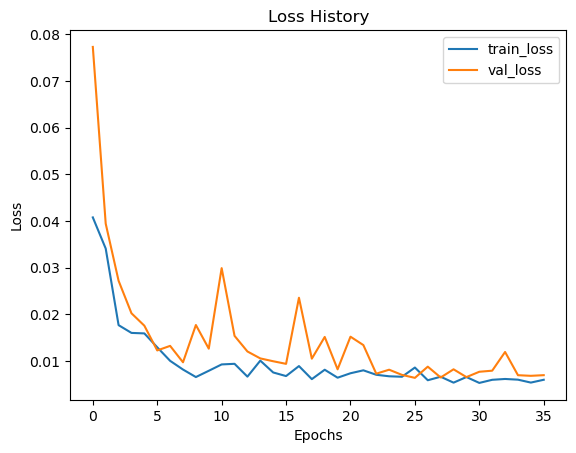

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

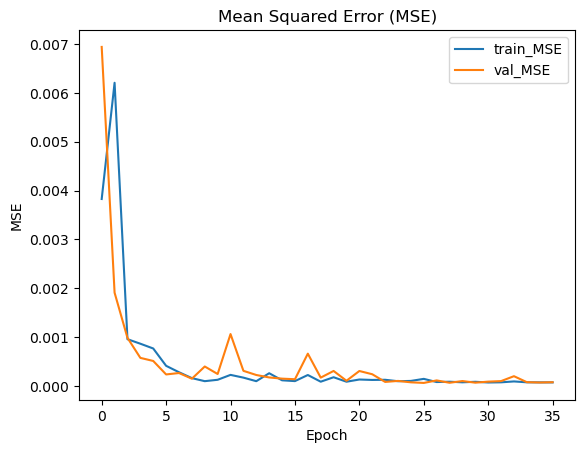

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

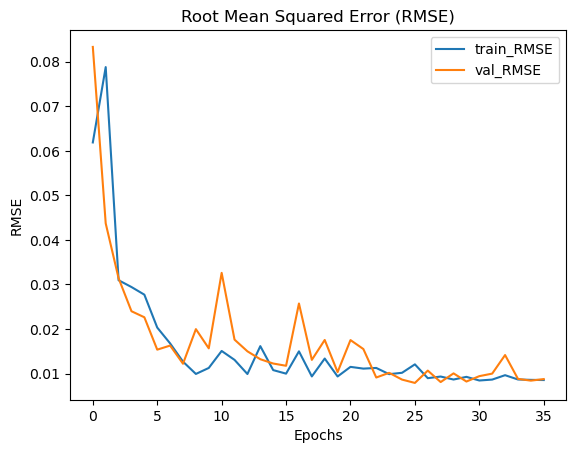

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

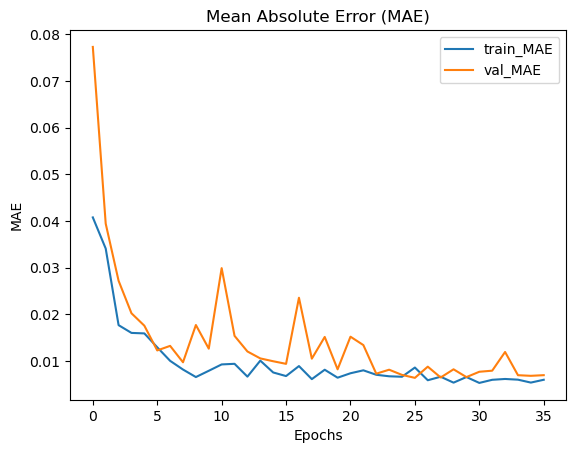

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

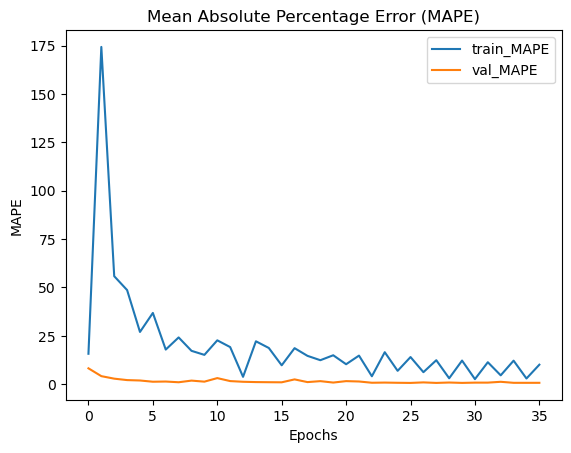

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:27:39.217985: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


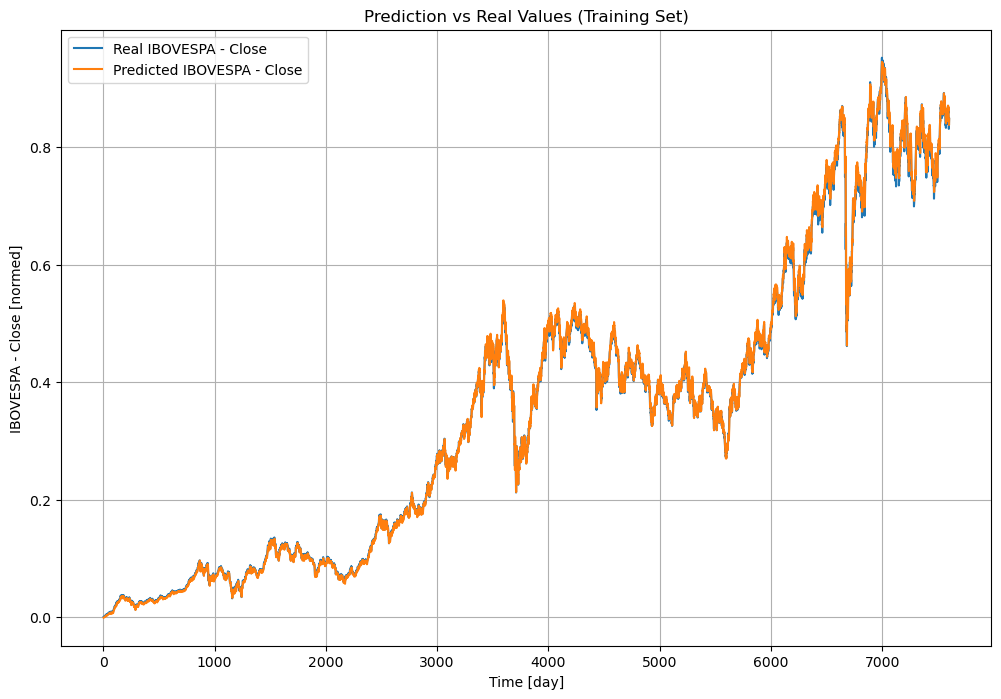

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


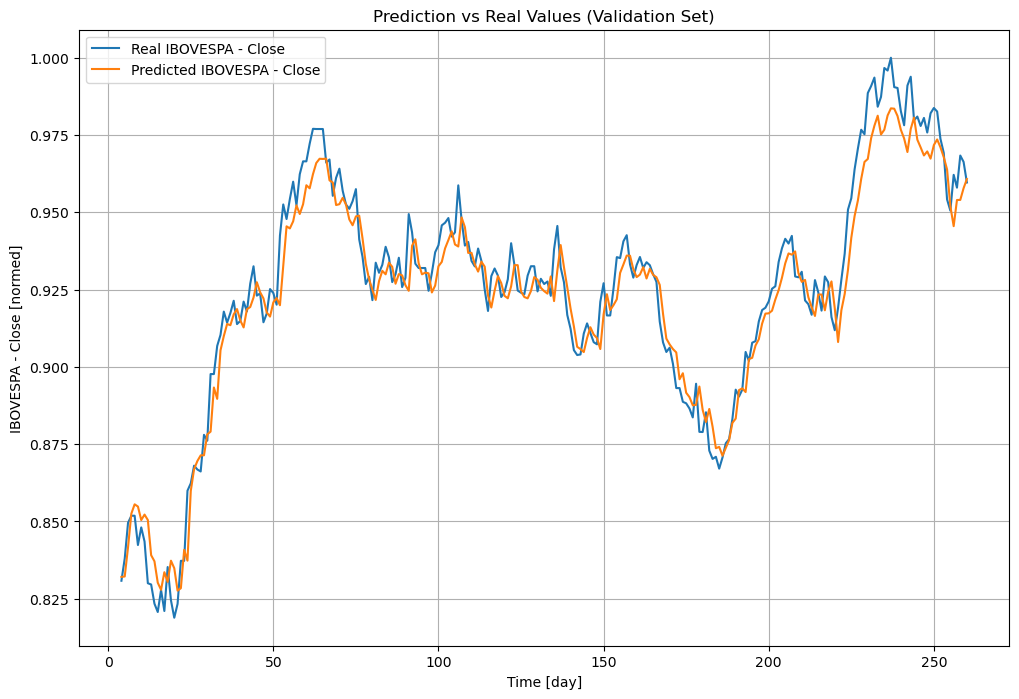

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


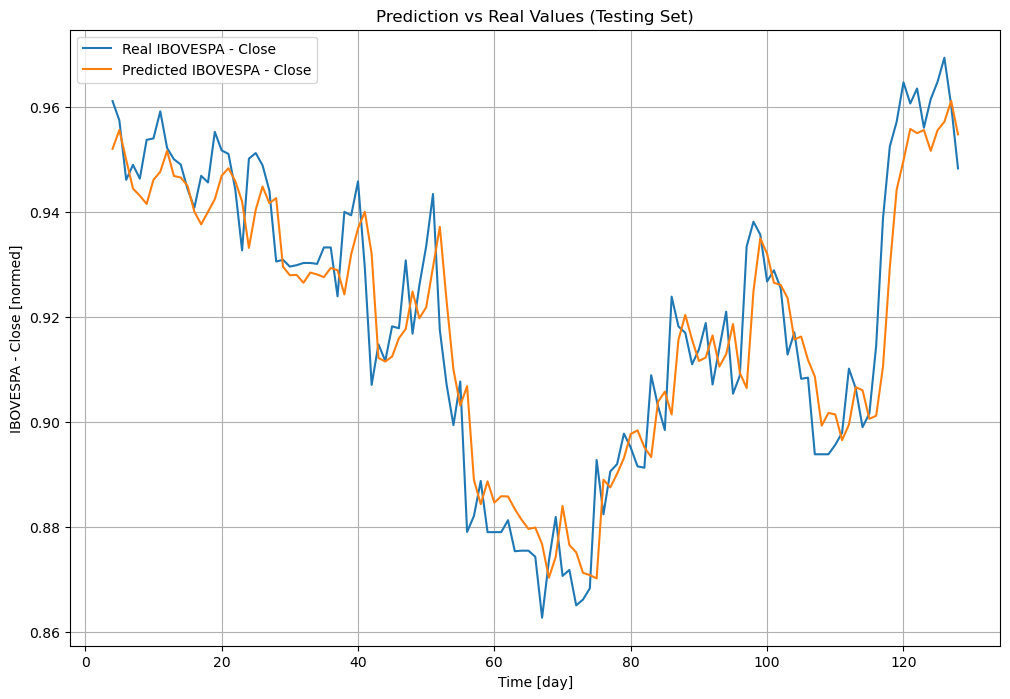

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

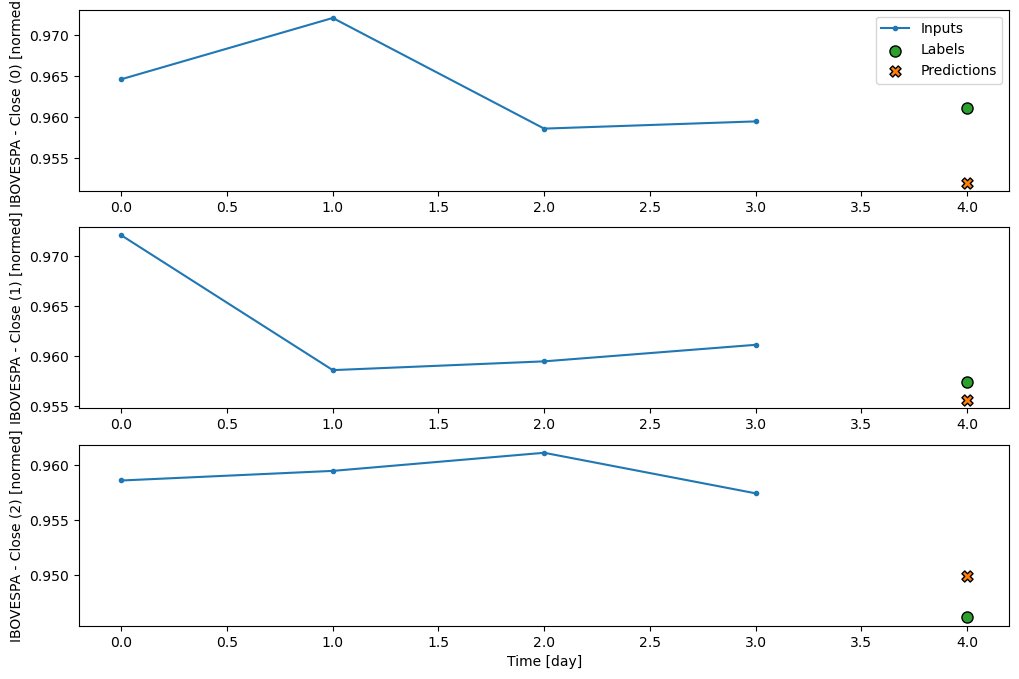

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:55s:26ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[[0.95201457, 0.95201457, 0.95201457, ..., 0.95201457,
         0.95201457, 0.95201457]],

       [[0.9555971 , 0.9555971 , 0.9555971 , ..., 0.9555971 ,
         0.9555971 , 0.9555971 ]],

       [[0.9499131 , 0.9499131 , 0.9499131 , ..., 0.9499131 ,
         0.9499131 , 0.9499131 ]],

       ...,

       [[0.9571642 , 0.9571642 , 0.9571642 , ..., 0.9571642 ,
         0.9571642 , 0.9571642 ]],

       [[0.96114916, 0.96114916, 0.96114916, ..., 0.96114916,
         0.96114916, 0.96114916]],

       [[0.95477057, 0.95477057, 0.95477057, ..., 0.95477057,
         0.95477057, 0.95477057]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')